<a href="https://colab.research.google.com/github/sanlakshya/Python-Workbooks/blob/main/Product_Analytics_RCA_for_UBER_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Product Analytics-UBER***

In [12]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
!gdown https://drive.google.com/file/d/1ZhqCqM5xtMNsun-xBhfvtrYH2RlM1Ue5/view

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1ZhqCqM5xtMNsun-xBhfvtrYH2RlM1Ue5
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1ZhqCqM5xtMNsun-xBhfvtrYH2RlM1Ue5/view
To: /content/view
44.3kB [00:00, 29.1MB/s]


In [16]:
df=pd.read_csv("uber-data.csv",parse_dates=[4,5],na_values='NA')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [17]:
df.shape#numbers of rows and column

(6745, 6)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [20]:
#Checking Null values
df.isnull().sum()/len(df)*100

,0
Request id,0.000000
Pickup point,0.000000
Driver id,39.288362
Status,0.000000
Request timestamp,0.000000
Drop timestamp,58.028169


In [21]:
#Cheking duplicates Value
df.duplicated().sum()

np.int64(0)

In [24]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], format='mixed', dayfirst=True)
df['RequestHour']=df['Request timestamp'].dt.hour

In [26]:
df["Time Slot"] = df['RequestHour'].apply(lambda x: "Dawn" if x < 5 else ("Early Morning" if x < 10 else ("Day" if x < 17 else ("Late Evening" if x < 22 else "Night"))))

In [28]:
df["Cab Availability"]=df["Status"].apply( lambda x: "Available" if x=="Trip Completed" else "Not Available")

In [29]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestHour,TimeSlot,Cab Availability
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00,11,Day,Available
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47,17,Late Evening,Available
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58,9,Early Morning,Available
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03,21,Late Evening,Available
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,8,Early Morning,Available


In [30]:
df["Cab Availability"].value_counts(normalize=True)*100

,proportion
Cab Availability,
Not Available,58.028169
Available,41.971831


In [12]:
#Analyses on the Internal Data
#Timeslot, AirportvsCity ,Driver based ID cancellation

<Axes: xlabel='RequestHour'>

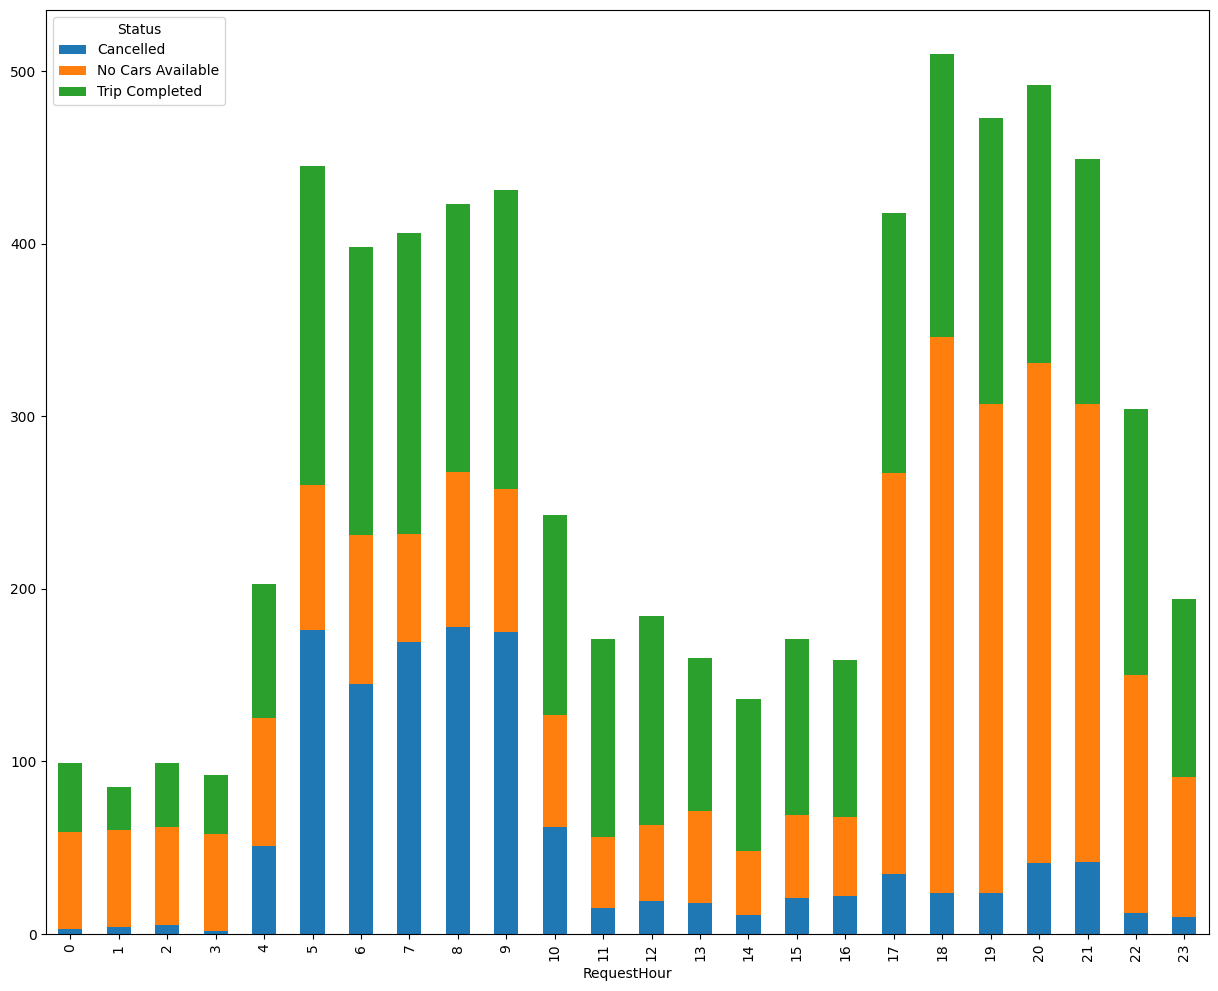

In [32]:
df.groupby(['RequestHour','Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(15,12))

In [12]:
#More cancellation -4 to 10 (early hour) and more cab unavailability --evening hour(MOstly happen at this time)

In [12]:
#AIRPORT VS CITY

<Axes: xlabel='RequestHour'>

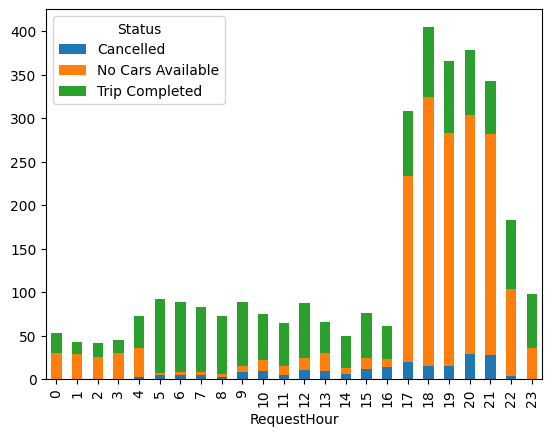

In [34]:
df[df["Pickup point"]=="Airport"].groupby(["RequestHour","Status"]).size().unstack().plot(kind='bar', stacked=True)

In [12]:
#Observations-
#No cab Available in the 5pm to 9 pm
#Low cancellation

<Axes: xlabel='RequestHour'>

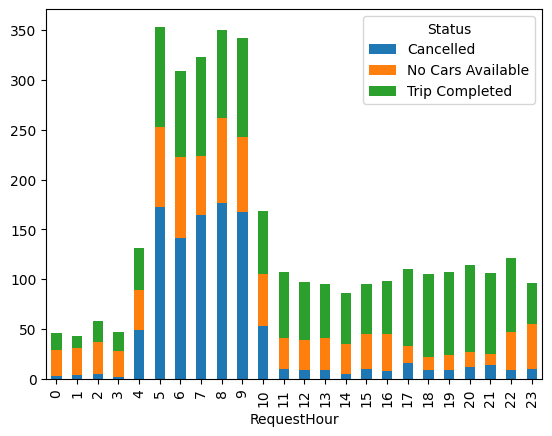

In [36]:
df[df["Pickup point"]=="City"].groupby(["RequestHour","Status"]).size().unstack().plot(kind='bar', stacked=True)

In [12]:
#Mostly Cancelled during the 5am to 9 am
#High Demand in the mornings

In [12]:
##High Demand of cab(5 to 9 pm) but not enough cabs available (Driver might be tired by evening)
#Airport taxies are not allowing the uber taxies on airport
#Between 5 to 9 am there is high demand in city but lot of cancellation
#solution-extra incentives for drivers to take the airport cab in evening
#for airport,inc. distance of car checking based on the data ,proactively provide more cab in the HOTSPOT
#To reduce cancellation-extrac incentives, good rating given more cabs ,cancellation charge borne by the drivers ,cancellation based on the rating score
